## Name: Arya Kashikar
## PRN: 22070521036
### Practical: Data Science Lab
### Dataset: Salary dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
data = pd.read_csv(r"C:\Users\sit.lab4\Downloads\Salary_Data[1].csv")

In [53]:
print("Dataset Preview:")
print(data.head())


Dataset Preview:
   Years of Experience    Salary
0                  5.0   90000.0
1                  3.0   65000.0
2                 15.0  150000.0
3                  7.0   60000.0
4                 20.0  200000.0


In [55]:
print("\nDataset Summary:")
print(data.info())


Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
Index: 6699 entries, 0 to 6703
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  6699 non-null   float64
 1   Salary               6699 non-null   float64
dtypes: float64(2)
memory usage: 157.0 KB
None


In [9]:
data.shape

(6704, 6)

In [11]:
data.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [57]:
print("\nMissing Values:")
print(data.isnull().sum())



Missing Values:
Years of Experience    0
Salary                 0
dtype: int64


In [41]:
data = data[['Years of Experience', 'Salary']].dropna()



===== UNIVARIATE ANALYSIS =====

Statistical Summary:
       Years of Experience         Salary
count          6699.000000    6699.000000
mean              8.095014  115326.964771
std               6.059853   52786.183911
min               0.000000     350.000000
25%               3.000000   70000.000000
50%               7.000000  115000.000000
75%              12.000000  160000.000000
max              34.000000  250000.000000


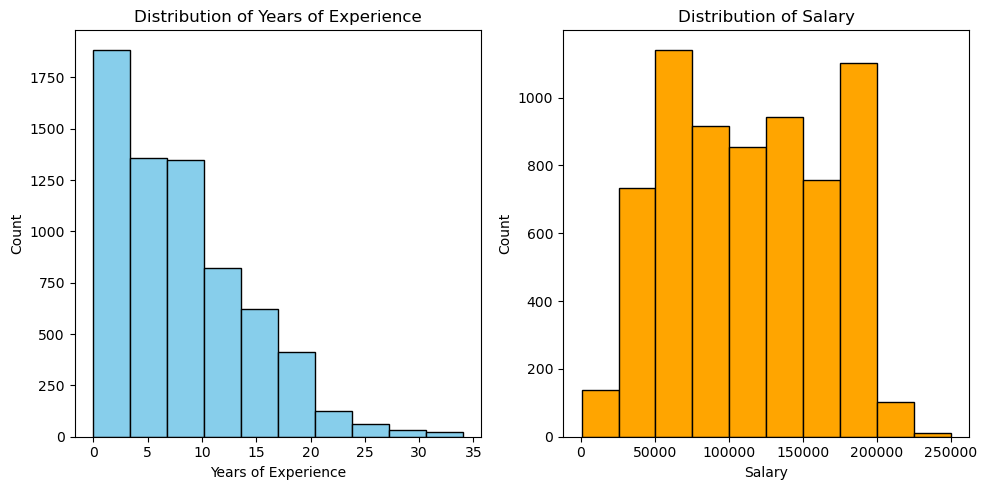

In [33]:
# UNIVARIATE ANALYSIS


# Summary statistics
print("\nStatistical Summary:")
print(data.describe())
# Histogram
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(data['Years of Experience'], bins=10, color='skyblue', edgecolor='black')
plt.title("Distribution of Years of Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Count")

plt.subplot(1,2,2)
plt.hist(data['Salary'], bins=10, color='orange', edgecolor='black')
plt.title("Distribution of Salary")
plt.xlabel("Salary")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

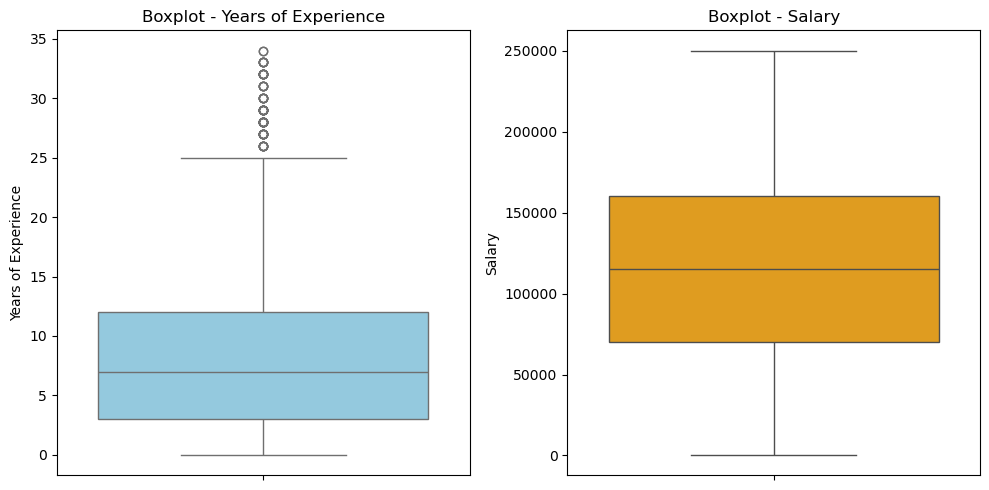

In [37]:
# Boxplots for outlier detection
import seaborn as sns
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(y=data['Years of Experience'], color='skyblue')
plt.title("Boxplot - Years of Experience")

plt.subplot(1,2,2)
sns.boxplot(y=data['Salary'], color='orange')
plt.title("Boxplot - Salary")
plt.tight_layout()
plt.show()



===== BIVARIATE ANALYSIS =====


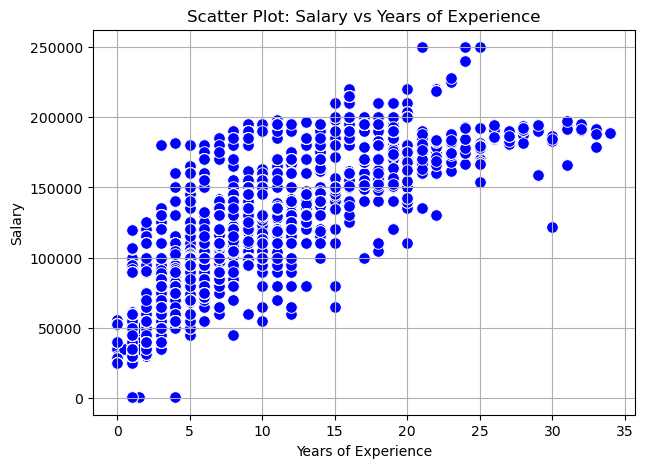

In [39]:
# BIVARIATE ANALYSIS

print("\n===== BIVARIATE ANALYSIS =====")

# Scatter plot
plt.figure(figsize=(7,5))
sns.scatterplot(x='Years of Experience', y='Salary', data=data, color='blue', s=70)
plt.title("Scatter Plot: Salary vs Years of Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.grid(True)
plt.show()

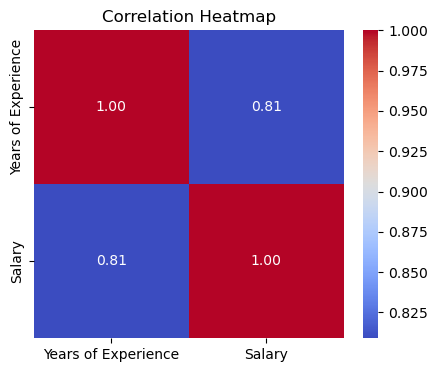

In [43]:
# Correlation heatmap
plt.figure(figsize=(5,4))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [15]:
# Step 6: Split data into training and test sets
X = data[['Years of Experience']]
y = data['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [47]:
# Step 7: Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [19]:
# Step 8: Model coefficients
print("\nIntercept (b0):", model.intercept_)
print("Slope (b1):", model.coef_[0])


Intercept (b0): 58398.09344836343
Slope (b1): 7042.700439786712


In [21]:
# Step 9: Make predictions
y_pred = model.predict(X_test)

In [23]:
# Step 10: Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [25]:
print("\nModel Performance:")
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)



Model Performance:
Mean Absolute Error (MAE): 24722.101443221924
Root Mean Squared Error (RMSE): 30770.654489455297
R² Score: 0.6669549610495003


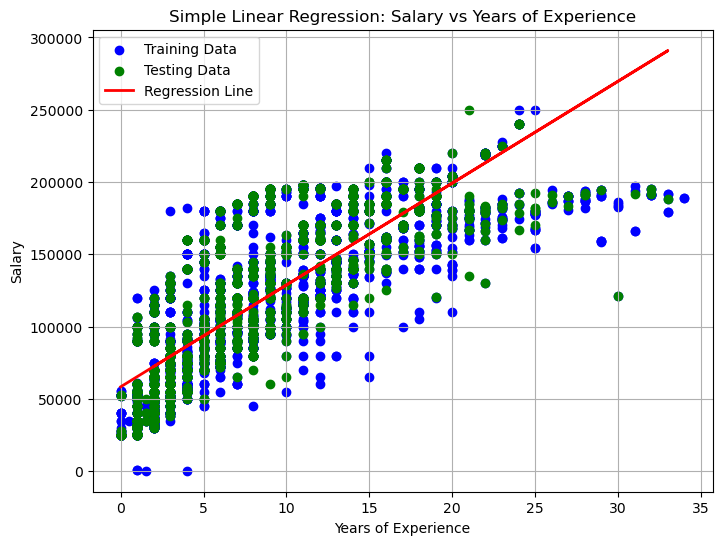

In [27]:
# Step 11: Visualize Regression Line
plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Testing Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title("Simple Linear Regression: Salary vs Years of Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.grid(True)
plt.show()


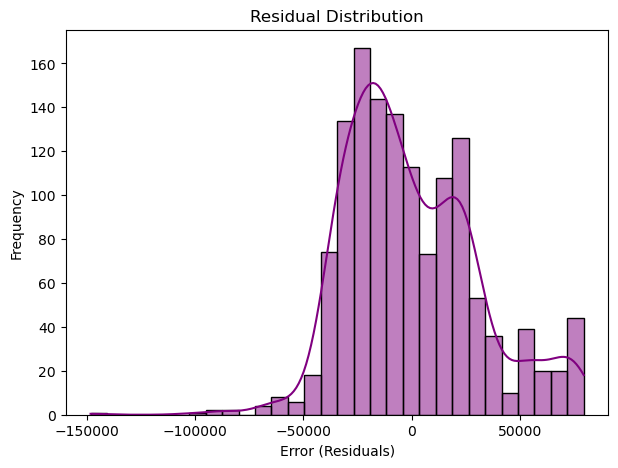

In [49]:
# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(7,5))
sns.histplot(residuals, kde=True, color='purple')
plt.title("Residual Distribution")
plt.xlabel("Error (Residuals)")
plt.ylabel("Frequency")
plt.show()

In [29]:
# Step 12: Predict new value (optional)
exp = float(input("\nEnter Years of Experience to predict Salary: "))
pred_salary = model.predict([[exp]])
print(f"Predicted Salary for {exp} years of experience: {pred_salary[0]:.2f}")



Enter Years of Experience to predict Salary:  7


Predicted Salary for 7.0 years of experience: 107697.00


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
